In [7]:
from fastai.text import *
import pandas as pd
from fastai.callbacks import *

In [8]:
torch.cuda.is_available()

True

In [ ]:
#data_path = Config.data_path()


In [17]:
path = Path('../data/')

In [18]:
df = pd.read_csv(path/'03_classification_valid_train.csv', error_bad_lines=False, index_col=0)

In [19]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22885,Society & Culture,Communities,Critical Approaches to Discourse Analysis Acro...,http://cadaad.net/,http,"['cadaad', 'net']",cadaad,net,NaN,NaN,NaN,NaN,True
11177,Education & Research,Higher Education,SALAMI - Shared Aggregation of LAbour Market I...,http://www.nottingham.ac.uk/eportfolio/salami,http,"['www', 'nottingham', 'ac', 'uk']",www,nottingham,ac,uk,NaN,NaN,True
14513,"Government, Law & Politics",Political Parties,"Camborne, Redruth and Hayle Liberal Democrats",http://crhlibdems.org/,http,"['crhlibdems', 'org']",crhlibdems,org,NaN,NaN,NaN,NaN,True
2531,Arts & Humanities,Literature,She Also Wrote Plays,http://www.susan.croft.btinternet.co.uk/,http,"['www', 'susan', 'croft', 'btinternet', 'co', ...",www,susan,croft,btinternet,co,uk,True


## LM

In [10]:
df.Title.to_csv(path/'lm_data.txt', header=None, index=None, sep=' ', mode='w')

In [14]:
Path('../data/lm_text').mkdir()

In [16]:
for i,k in df.iterrows():
    txt = k['Title']
    with open(f'../data/lm_text/{i}.txt','a') as f:
        f.write(txt)

In [20]:
data = Path('../data/lm_text/')

In [26]:
#!kaggle datasets download -d manyregression/sp-en-wiki-100kk

 99%|███████████████████████████████████████▌| 819M/827M [00:18<00:00, 41.3MB/s]
100%|████████████████████████████████████████| 827M/827M [00:18<00:00, 47.6MB/s]


In [28]:
#!unzip sp-en-wiki-100kk.zip

Archive:  sp-en-wiki-100kk.zip
  inflating: data/data_en_wiki_15000  
  inflating: data/data_en_wiki_15000_bwd  
  inflating: data/tmp/spm.model      
  inflating: data/tmp/spm.vocab      


In [30]:
#!ls 

01_data.ipynb		04_nlp.ipynb	   data
02_random_forest.ipynb	"cache_dir".model  models
_03_tabular.ipynb	"cache_dir".vocab  sp-en-wiki-100kk.zip


## Unigram 

In [22]:
import sentencepiece as spm
spm.SentencePieceTrainer.train('--input=../data/lm_data.txt --model_prefix=spm --vocab_size=10000 --model_type=unigram')
sp = spm.SentencePieceProcessor()

In [26]:
Path('../data/title_lm/tmp/spm/').mkdir(parents=True)

In [36]:
!cp spm.model ../data/title_lm/tmp/spm.model
!cp spm.vocab ../data/title_lm/tmp/spm.vocab

In [21]:
spp = "../data/title_lm/"

In [22]:
dlm = (TextList.from_folder(data, extensions='.txt',
                            processor=[OpenFileProcessor(),SPProcessor.load(spp)])                             
       .split_by_rand_pct().
       label_for_lm().databunch(bs=32))

In [23]:
dlm

TextLMDataBunch;

Train: LabelList (21439 items)
x: LMTextList
▁ x x bo s ▁ x x maj ▁la dy ▁ x x maj ▁car o line ▁ x x maj ▁la mb ▁ x x maj ▁website , ▁ x x maj ▁the,▁ x x bo s ▁ x x maj ▁ ca ven d ish,▁ x x bo s ▁ x x maj ▁children ▁and ▁ x x maj ▁technology ▁ x x maj ▁la b , ▁the child ren ▁and ▁ x x maj ▁technology ▁ x x maj ▁la b , ▁ x x maj ▁the,▁ x x bo s ▁ x x maj ▁ ra ndom ▁ x x maj ▁ act s ▁of ▁ x x maj ▁real ity ▁- ▁ x x maj ▁t ry ing ▁to ▁ kill ▁as ▁few ▁people ▁as ▁po ssible ra ndom ▁ x x maj ▁ act s ▁of ▁ x x maj ▁real ity ▁- ▁ x x maj ▁t ry ing ▁to ▁ kill ▁as ▁few ▁people ▁as ▁po ssible,▁ x x bo s ▁ gra n u larity , ▁ x x maj ▁a ud it , ▁ x x maj ▁ n - t ier , ▁and ▁ x x maj ▁de legation ▁ x x up ▁( gra n d )
y: LMLabelList
,,,,
Path: ../data/lm_text;

Valid: LabelList (5359 items)
x: LMTextList
▁ x x bo s ▁ x x maj ▁ west ▁ x x maj ▁w il t shire ▁ x x maj ▁dis trict ▁ x x maj ▁c ouncil,▁ x x bo s ▁ x x maj ▁ here ford shire ▁link,▁ x x bo s ▁ x x maj ▁ tha mes ▁ x x maj 

# Use title to start

In [24]:
LM_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True, drop_mult=0.5)

In [25]:
LM_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


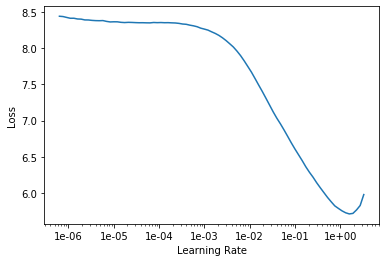

In [26]:
LM_learn.recorder.plot()

In [27]:
LM_learn.fit_one_cycle(5,max_lr=1e-01,
                       callbacks=[SaveModelCallback(LM_learn, every='improvement', monitor='accuracy', name='best_lm')])

epoch,train_loss,valid_loss,accuracy,time
0,2.308363,2.183522,0.652138,01:41
1,2.288783,2.126565,0.660560,01:43
2,2.164981,1.979422,0.673650,01:43
3,1.875284,1.784860,0.690537,01:43
4,1.739782,1.720411,0.695971,01:43


Better model found at epoch 0 with accuracy value: 0.6521384119987488.
Better model found at epoch 1 with accuracy value: 0.6605600118637085.
Better model found at epoch 2 with accuracy value: 0.6736496090888977.
Better model found at epoch 3 with accuracy value: 0.6905367374420166.
Better model found at epoch 4 with accuracy value: 0.6959710717201233.


In [28]:
LM_learn.load('best_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (21439 items)
x: LMTextList
▁ x x bo s ▁ x x maj ▁la dy ▁ x x maj ▁car o line ▁ x x maj ▁la mb ▁ x x maj ▁website , ▁ x x maj ▁the,▁ x x bo s ▁ x x maj ▁ ca ven d ish,▁ x x bo s ▁ x x maj ▁children ▁and ▁ x x maj ▁technology ▁ x x maj ▁la b , ▁the child ren ▁and ▁ x x maj ▁technology ▁ x x maj ▁la b , ▁ x x maj ▁the,▁ x x bo s ▁ x x maj ▁ ra ndom ▁ x x maj ▁ act s ▁of ▁ x x maj ▁real ity ▁- ▁ x x maj ▁t ry ing ▁to ▁ kill ▁as ▁few ▁people ▁as ▁po ssible ra ndom ▁ x x maj ▁ act s ▁of ▁ x x maj ▁real ity ▁- ▁ x x maj ▁t ry ing ▁to ▁ kill ▁as ▁few ▁people ▁as ▁po ssible,▁ x x bo s ▁ gra n u larity , ▁ x x maj ▁a ud it , ▁ x x maj ▁ n - t ier , ▁and ▁ x x maj ▁de legation ▁ x x up ▁( gra n d )
y: LMLabelList
,,,,
Path: ../data/lm_text;

Valid: LabelList (5359 items)
x: LMTextList
▁ x x bo s ▁ x x maj ▁ west ▁ x x maj ▁w il t shire ▁ x x maj ▁dis trict ▁ x x maj ▁c ouncil,▁ x x bo s ▁ x x maj ▁ here ford shire ▁link,▁ x x bo s ▁ x x maj

In [29]:
#LM_learn.path
LM_learn.save_encoder('ft_enc')

In [47]:
#

## Classification 

In [36]:
spp = "../data/title_lm/"

In [37]:
data_class = (TextList.
        from_df(df,path='.',cols=['Title'],processor=SPProcessor.load(spp), vocab=dlm.train_ds.vocab)
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=64))

In [38]:
data_class.save('nlp_data')

In [39]:
data_class = load_data('.','nlp_data')


In [40]:
f1 = FBeta(average='macro')

In [41]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5, metrics=[accuracy,f1])

In [42]:
learn_class.path = LM_learn.path


In [43]:
learn_class.load_encoder('ft_enc');

In [44]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02
Min loss divided by 10: 2.51E-02


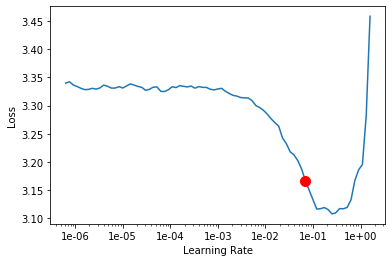

In [46]:
learn_class.recorder.plot(suggestion=True)

In [48]:
learn_class.fit_one_cycle(5, max_lr=learn_class.recorder.min_grad_lr, 
                          callbacks=[SaveModelCallback(learn_class, monitor='f_beta', every='improvement',
                                                      name='best_nlp_class_unigram')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.321982,2.257988,0.237841,0.079400,01:15
1,2.328164,2.319779,0.204379,0.037797,01:18
2,2.266409,2.198220,0.275781,0.059677,01:22
3,2.232999,2.124181,0.277771,0.085447,01:24
4,2.188609,2.092826,0.302152,0.109626,01:22


Better model found at epoch 0 with f_beta value: 0.07940029352903366.
Better model found at epoch 3 with f_beta value: 0.08544692397117615.
Better model found at epoch 4 with f_beta value: 0.10962604731321335.


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 3.98E-03


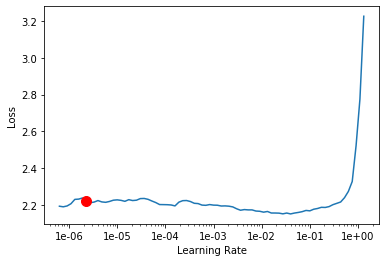

In [49]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot(suggestion=True)

In [52]:
learn_class.fit_one_cycle(5, max_lr=slice(1e-06,1e-02),
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta', every='improvement',
                                                      name='best_nlp_class_unigram')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.175913,2.017465,0.327653,0.129992,01:29
1,2.041941,1.844819,0.395820,0.171551,01:24
2,1.948502,1.723865,0.425799,0.193238,01:26
3,1.920036,1.707387,0.439358,0.217630,01:23
4,1.845545,1.662533,0.439856,0.215988,01:25


Better model found at epoch 0 with f_beta value: 0.1299920380115509.
Better model found at epoch 1 with f_beta value: 0.17155113816261292.
Better model found at epoch 2 with f_beta value: 0.19323785603046417.
Better model found at epoch 3 with f_beta value: 0.21763023734092712.


In [54]:
learn_class.load('best_nlp_class_unigram');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.29E-07


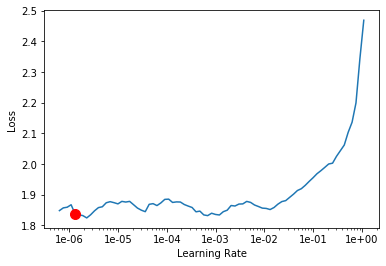

In [56]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot(suggestion=True)

In [57]:
learn_class.fit_one_cycle(5, max_lr=learn_class.recorder.min_grad_lr,
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta', every='improvement',
                                                      name='best_nlp_class_unigram')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.859702,1.675505,0.434382,0.211522,01:30
1,1.840085,1.669430,0.435626,0.211953,01:20
2,1.856460,1.667304,0.438612,0.211039,01:25
3,1.850343,1.668717,0.436497,0.207252,01:28
4,1.813092,1.669264,0.434258,0.209852,01:28


Better model found at epoch 0 with f_beta value: 0.21152161061763763.
Better model found at epoch 1 with f_beta value: 0.21195338666439056.


In [97]:
learn_class.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(10000, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(10000, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, 

In [98]:
learn_class.load('best_nlp_class_unigram')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (26798 items)
x: TextList
▁ x x bo s ▁ 68 ▁ x x maj ▁de an ▁ x x maj ▁street,▁ x x bo s ▁ x x maj ▁a band on ed ▁ x x maj ▁communities,▁ x x bo s ▁ x x maj ▁a lex ander ▁ x x maj ▁th om son ▁ x x maj ▁society,▁ x x bo s ▁ x x maj ▁ ara b ▁ x x maj ▁b ritish ▁ x x maj ▁centre , ▁ x x maj ▁the,▁ x x bo s ▁ x x maj ▁ architect ural ▁ x x maj ▁as sociation ▁ x x maj ▁school ▁of ▁ x x maj ▁architecture
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TextList
▁ x x bo s ▁ x x maj ▁ old ▁ x x up ▁ bb c ▁ x x maj ▁radi o ▁ x x maj ▁ broad cast ing ▁ x x maj ▁ equ ip ment ▁and ▁ x x maj ▁memories,▁ x x bo s ▁ x x maj ▁leader s ▁ x x maj ▁we ▁ x x maj ▁d eserve,▁ x x bo s ▁ x x maj ▁ cam bridge shire ▁ x x maj ▁community ▁ x x maj ▁found ation,▁ x x bo s ▁ x x maj ▁ bar ry ▁ x x maj ▁sh e erman ▁ x x up ▁m p,▁ x x bo s ▁ x x maj ▁f ood ▁ x x ma

In [105]:
learn_class.path = Path('.')

In [106]:
learn_class.export('final_nlp_unigram.pkl')

In [107]:
learn = load_learner('.', 'final_nlp_unigram.pkl')

In [108]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(10000, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(10000, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, 

# Default SpaCy tokenization 

Try the same as above but using default SpaCy tokenization 

In [11]:
dlm = (TextList.
        from_df(df,path='.',cols=['Title'])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=32))

In [12]:
LM_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True, drop_mult=0.5)

In [13]:
LM_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


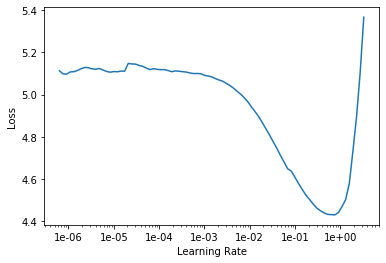

In [14]:
LM_learn.recorder.plot()

In [15]:
LM_learn.fit_one_cycle(5,max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,3.133240,2.466454,0.579530,00:35
1,2.913282,2.309691,0.596022,00:35
2,2.618169,1.963048,0.642529,00:35
3,2.255040,1.670414,0.687644,00:35
4,1.961717,1.589451,0.701471,00:35


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


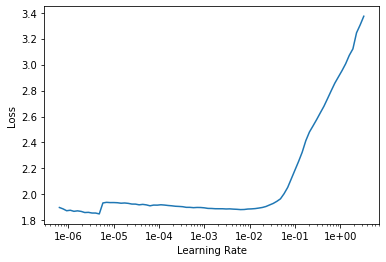

In [17]:
LM_learn.unfreeze()
LM_learn.lr_find()
LM_learn.recorder.plot()

In [18]:
LM_learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.939581,1.573147,0.703650,00:36
1,1.845344,1.563947,0.705397,00:36


In [19]:
LM_learn.save_encoder('word_ft_enc')

In [50]:
data_class = (TextList.
        from_df(df,path='.',cols=['Title'],vocab=dlm.train_ds.vocab)
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=32))

In [52]:
data_class.save('nlp_data')

In [60]:
f1 = FBeta(average='macro')

In [61]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5, metrics=[accuracy,f1])
learn_class.load_encoder('word_ft_enc');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


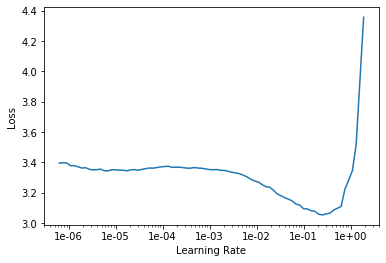

In [62]:
learn_class.lr_find()
learn_class.recorder.plot()

In [63]:
learn_class.fit_one_cycle(10,max_lr=slice(1e-03,1e-01))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.124730,2.057811,0.347804,0.121668,00:45
1,2.270530,2.160658,0.303645,0.073348,00:46
2,2.321504,2.501637,0.342953,0.091503,00:47
3,2.349716,2.262418,0.300411,0.058776,00:46
4,2.226366,2.216307,0.271800,0.061104,00:42
5,2.214906,3.903244,0.359124,0.106252,00:48
6,2.150010,2.039363,0.359871,0.092294,00:47
7,2.069534,2.106908,0.372932,0.143399,00:44
8,2.024736,1.873645,0.388979,0.142565,00:48
9,2.017729,1.871500,0.393706,0.152948,00:45


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


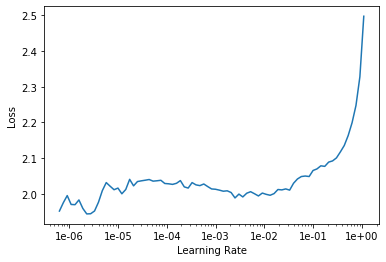

In [66]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot()

In [67]:
learn_class.fit_one_cycle(30,max_lr=slice(1e-06,1e-03),
                         callbacks=[SaveModelCallback(learn_class,
                                                      monitor='f_beta',
                                                      every='improvement',
                                                     name='best_word_class')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.990130,1.868934,0.393457,0.149483,00:53
1,1.973262,1.860101,0.395447,0.151834,00:50
2,1.986470,1.845242,0.406891,0.160279,00:56
3,1.978784,1.789261,0.420077,0.173285,00:53
4,1.897381,2.007979,0.433760,0.179544,00:52
5,1.805450,1.827324,0.450056,0.187066,00:52
6,1.830709,2.285218,0.464486,0.203598,00:56
7,1.826884,1.668991,0.476179,0.204158,00:54
8,1.701233,1.565887,0.479413,0.203825,00:52
9,1.776116,2.348875,0.495708,0.228881,00:50


Better model found at epoch 0 with f_beta value: 0.14948250353336334.
Better model found at epoch 1 with f_beta value: 0.15183354914188385.
Better model found at epoch 2 with f_beta value: 0.16027888655662537.
Better model found at epoch 3 with f_beta value: 0.17328473925590515.
Better model found at epoch 4 with f_beta value: 0.17954358458518982.
Better model found at epoch 5 with f_beta value: 0.18706557154655457.
Better model found at epoch 6 with f_beta value: 0.20359832048416138.
Better model found at epoch 7 with f_beta value: 0.20415812730789185.
Better model found at epoch 9 with f_beta value: 0.22888125479221344.
Better model found at epoch 11 with f_beta value: 0.24215374886989594.
Better model found at epoch 12 with f_beta value: 0.24618105590343475.
Better model found at epoch 13 with f_beta value: 0.27995797991752625.
Better model found at epoch 15 with f_beta value: 0.281621515750885.
Better model found at epoch 17 with f_beta value: 0.29313281178474426.
Better model foun

In [69]:
learn_class.export('final_nlp_word.pkl')

# LM on the URL 

In the previous notebook tabular data was generated by splitting the URLS somewhat crudely. It might be better to just use the URLS in a LM. Since the urls are esentially one word we'll start with BPE tokenization. This will hopefully also help us deal with any out of vocabularly words that might occur because the website is about a specialist domain. 

In [69]:
Path('../data/url_text/tmp').mkdir(parents=True)

PosixPath('../data/processed')

In [60]:
df.URL.to_csv(path/'url_lm_data.txt', header=None, index=None, sep=' ', mode='w')

In [61]:
path.ls()

[PosixPath('../data/lm_text'),
 PosixPath('../data/lm_data.txt'),
 PosixPath('../data/.ipynb_checkpoints'),
 PosixPath('../data/lm_data_url_title.txt'),
 PosixPath('../data/title_url_lm'),
 PosixPath('../data/02_classification_split_urls.csv'),
 PosixPath('../data/raw'),
 PosixPath('../data/03_classification_valid_train.csv'),
 PosixPath('../data/title_lm'),
 PosixPath('../data/url_lm_data.txt'),
 PosixPath('../data/classification.tsv')]

In [63]:
import sentencepiece as spm
spm.SentencePieceTrainer.train('--input=../data/url_lm_data.txt --model_prefix=spm --vocab_size=2000 --model_type=BPE')
sp = spm.SentencePieceProcessor()


In [242]:
#!mkdir tmp

mkdir: cannot create directory ‘tmp’: File exists


In [70]:
!cp spm.model ../data/url_text/tmp/spm.model
!cp spm.vocab ../data/url_text/tmp/spm.vocab

In [73]:
spp = '../data/url_text/'

In [74]:
dlm = (TextList.
        from_df(df,path='.',cols=['URL'],
                processor=[OpenFileProcessor(),SPProcessor.load(spp)])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=64))

In [75]:
dlm.show_batch()

idx,text
0,x bo s ▁http : ▁ / ▁ / ▁ www . ara bb ri tish centre . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . a as chool . ac . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ah ra - archit ect ure . org ▁ /
1,/ ▁ / ▁ www . or i ent al ru g and tex ti les ociety . org . uk ▁ / ▁ index . php ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . or ig ins festival . bor der cro ss ings . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www
2,▁ / ▁ / ▁ www . mem ory sc ap e . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ge og . leeds . ac . uk ▁ / ▁ people ▁ / ▁ a . tur ner ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . mor et on
3,. info ▁ / ▁ x x bo s ▁https : ▁ / ▁ / ▁ sites . google . com ▁ / ▁ site ▁ / ▁ hu gh william william s ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . the hu gh es collection . co . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁
4,/ ▁ depart ments ▁ / ▁ arch ae ology ▁ / ▁ research ▁ / ▁ projects ▁ / ▁ wall ing ford ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . wall ing ford museum . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . w for al history . org


In [76]:
lm_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True)

In [77]:
lm_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


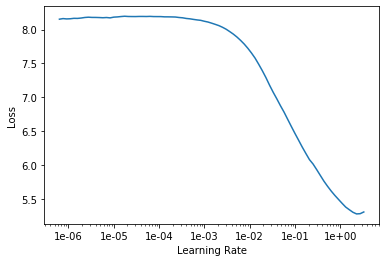

In [78]:
lm_learn.recorder.plot()

In [83]:
lm_learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.956592,1.546189,0.751981,01:06
1,1.802006,1.511753,0.750284,01:06
2,1.721894,1.424385,0.760324,01:06
3,1.606001,1.308832,0.767843,01:06
4,1.489665,1.269947,0.771987,01:07


In [84]:
lm_learn.save_encoder('url_ft_enc')

In [85]:
data_class = (TextList.from_df(df,path='.',cols=['URL'],
                processor=[OpenFileProcessor(),SPProcessor.load(spp)])
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=64))

In [86]:
f1 = FBeta(average='macro')

In [87]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5, metrics=[accuracy, f1])
learn_class.load_encoder('url_ft_enc');

In [88]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


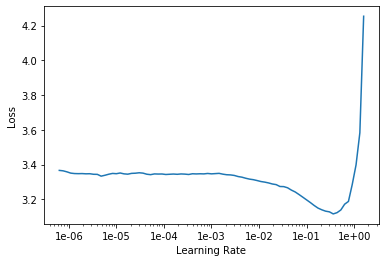

In [89]:
learn_class.recorder.plot()

In [91]:
learn_class.fit_one_cycle(10, max_lr=1e-01,
                         callbacks=[SaveModelCallback(learn_class,
                                                      monitor='f_beta', 
                                                     every='improvement',
                                                     name='best_url')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.306614,2.239815,0.236099,0.054969,01:13
1,2.369462,2.286489,0.215947,0.045339,01:14
2,2.371891,2.377884,0.183605,0.036221,01:14
3,2.381317,2.316836,0.190571,0.040416,01:08
4,2.356205,2.244326,0.228262,0.062343,01:15
5,2.306691,2.270541,0.222291,0.047285,01:15
6,2.318279,2.284617,0.224033,0.047084,01:15
7,2.282199,2.200838,0.246921,0.055426,01:14
8,2.256621,2.186006,0.252395,0.055080,01:14
9,2.231564,2.180720,0.248165,0.055380,01:16


Better model found at epoch 0 with f_beta value: 0.0549687035381794.
Better model found at epoch 4 with f_beta value: 0.062343377619981766.


In [92]:
learn_class.load('best_url');

RNNLearner(data=TextClasDataBunch;

Train: LabelList (26798 items)
x: TextList
▁ x x bo s ▁http : ▁ / ▁ / ▁ www . si x ty 8. com ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ab and on ed communities . co . uk ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . gre ek thom son . com ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ara bb ri tish centre . org . uk ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . a as chool . ac . uk ▁ /
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TextList
▁ x x bo s ▁http : ▁ / ▁ / ▁ www . or b em . co . uk ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ le ad ers w ed es er ve . wordpress . com ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . cam b sc f . org . uk ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . bar ry she er man . co . uk ▁ /,▁ x x bo s ▁http : ▁ / ▁ / ▁ www . food . gov . uk ▁ / ▁ food indust ry ▁ / ▁ imp orts ▁ / ▁ ban ne d _ res tr ic t ed ▁ / ▁ av ian imp orts ▁ /
y: CategoryList
Arts & Humanities,Dig

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


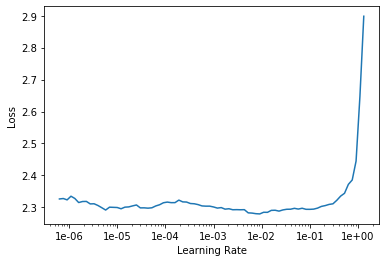

In [93]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot()

In [94]:
learn_class.fit_one_cycle(5, max_lr=slice(1e-04,1e-02),
                         callbacks=[SaveModelCallback(learn_class,
                                                      monitor='f_beta', 
                                                     every='improvement',
                                                     name='best_url')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.154460,2.057619,0.321184,0.116109,01:12
1,1.989012,23.817169,0.408757,0.165186,01:13
2,1.839009,3.188926,0.446822,0.201431,01:20
3,1.734644,16.409981,0.482150,0.256816,01:16
4,1.649122,13.513858,0.482896,0.246834,01:19


Better model found at epoch 0 with f_beta value: 0.11610881239175797.
Better model found at epoch 1 with f_beta value: 0.16518568992614746.
Better model found at epoch 2 with f_beta value: 0.20143121480941772.
Better model found at epoch 3 with f_beta value: 0.2568161189556122.
